c:\Users\GrHalbgott\mambaforge-pypy3\envs\geoai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\GrHalbgott\mambaforge-pypy3\envs\geoai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\GrHalbgott\mambaforge-pypy3\envs\geoai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\GrHalbgott\mambaforge-pypy3\envs\geoai\lib\site-packages\s

For n_clusters = 3 The average silhouette_score is : 0.5816937070990904
For n_clusters = 4 The average silhouette_score is : 0.44515298317187124
For n_clusters = 5 The average silhouette_score is : 0.3724955222706516
For n_clusters = 6 The average silhouette_score is : 0.5146383355996653


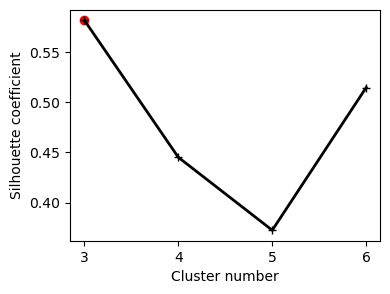

(3, 0.5816937070990904)


C:\Users\GrHalbgott\AppData\Local\Temp\ipykernel_19544\2353693108.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\GrHalbgott\mambaforge-pypy3\envs\geoai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


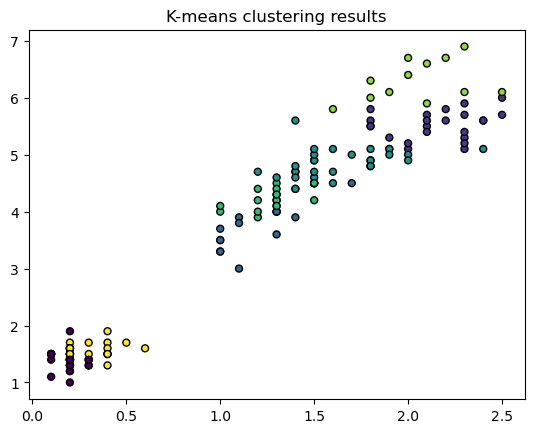

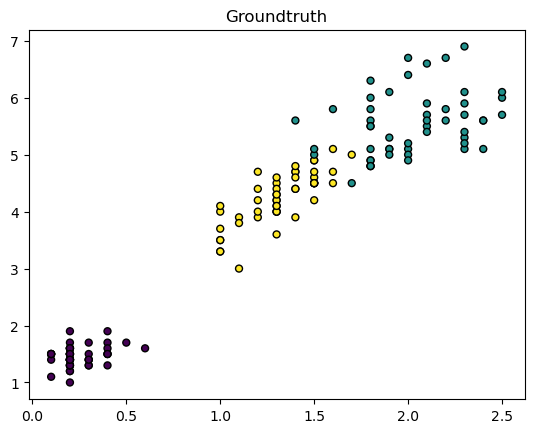

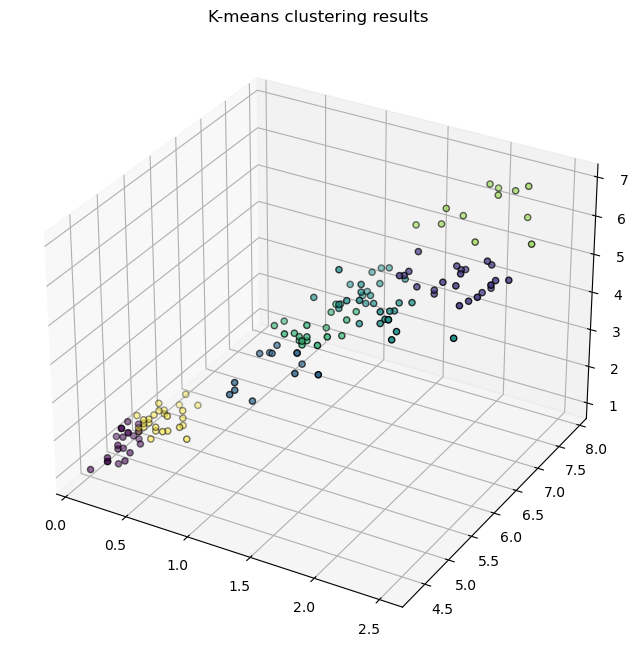

In [7]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



output_path=Path("./export")
output_path.mkdir(exist_ok=True)
outfile = output_path / "kmeans_result.csv"
ClUSTER_RANGE = [3,7]   # the possible range of cluster number
Write_res = True #whether to output the best cluster result
################################

'''
    plot the silhouette variation when using different cluster number
'''
def drawSilhouette(x,y,maxlabel,mycolor,mylabel):
    fig = plt.figure(1, figsize=(4, 3))
    plt.xlabel('Cluster number')
    plt.ylabel('Silhouette coefficient')

    #plot the point that yields the highest Silhouette coefficient value at K
    plt.plot(maxlabel[0],maxlabel[1], 'ro', markersize=6)

    # print the trend line
    plt.plot(x, y, color=mycolor, marker='+', label=mylabel,
        linewidth=2, markersize=6)

    #plot xticks
    plt.xticks(x)

    plt.show()
    fig.show()

    print(maxlabel)
'''
    test different clustering using K-means
'''
def cluster_getMaxK(ds):
    max_number=3
    max_value=0
    x_vec=[]
    y_vec=[]

    X = np.array(ds)

    for k in range(ClUSTER_RANGE[0],ClUSTER_RANGE[1]):
        clusterer = KMeans(n_clusters=k, n_init="auto")
        # run K-means
        clusterer.fit(X)

        # get predicted class labels
        cluster_labels = clusterer.labels_

        # compute silhouette_score
        silhouette_avg = silhouette_score(X, cluster_labels)

        # save the results k and the corresonding silhouette_score
        x_vec.append(k)
        y_vec.append(silhouette_avg)

        # find the maximum silhouette_score and the corresponding k
        if max_value < silhouette_avg:
          max_value = silhouette_avg
          max_number = k

        print("For n_clusters =", k,
              "The average silhouette_score is :", silhouette_avg)

    return x_vec,y_vec,(max_number,max_value)

'''
    test clustering using K-means when cluster number = k
'''
def cluster_getRes(ds, k):
    X0 = np.array(ds)
    X = X0[:,0:X0.shape[1]-1]
    y = X0[:,X0.shape[1]-1]

    clusterer = KMeans(n_clusters=k, random_state=10, n_init="auto")
    clusterer.fit(X)
    cluster_labels = clusterer.labels_
    res = pd.DataFrame(cluster_labels)
    res.to_csv(outfile)
    return [cluster_labels,y]


if __name__ == "__main__":

    ds = pd.read_csv("./data/data1.csv", index_col=0)

    n_cluster,n_silhouette,pnt = cluster_getMaxK(ds)


    drawSilhouette(n_cluster,n_silhouette,pnt,'black',"max")

    if Write_res:
        [y_pre, y_groundtruth] = cluster_getRes(ds,7) #best cluster #: pnt[0]

        ### plot the clustering results, using attributes with index of 0 and 1 as two axes
        plt.title("K-means clustering results")
        plt.scatter(ds.iloc[:,3], ds.iloc[:,2], marker='o', c=y_pre,
            s=25, edgecolor='k')
        plt.show()


        plt.title("Groundtruth")
        y_groundtruth = np.choose(y_groundtruth.astype(int), [0, 2, 1])
        plt.scatter(ds.iloc[:,3], ds.iloc[:,2], marker='o', c=y_groundtruth,
            s=25, edgecolor='k')
        plt.show()

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(projection="3d")
        ax.scatter(ds.iloc[:,3], ds.iloc[:,0], ds.iloc[:,2], c=y_pre.astype(int), edgecolor="k")
        ax.set_title("K-means clustering results")
